In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, auc, precision_recall_curve, confusion_matrix,plot_confusion_matrix, plot_precision_recall_curve,roc_auc_score, roc_curve, plot_roc_curve
from graphviz import Source
from pydotplus import graph_from_dot_data
from mlxtend.plotting import plot_decision_regions

# EXERCISES 1 - 5

In [2]:
X, y = load_iris(return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split( X[:, [2,3]], y, test_size=0.25, random_state=0)

In [3]:
DTC_model = DecisionTreeClassifier(max_depth=2)
DTC_model = DTC_model.fit(X_train, y_train)
y_pred = cross_val_predict(DTC_model, X_train, y_train)
confusion_matrix(y_train, y_pred)

array([[37,  0,  0],
       [ 0, 31,  3],
       [ 0,  3, 38]])

In [4]:
f1_score(y_train, y_pred, average='macro')

0.9461979913916786

In [5]:
predict = DTC_model.predict(X_test)
predict_proba = DTC_model.predict_proba(X_test)
predict_proba

array([[0.        , 0.02564103, 0.97435897],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02564103, 0.97435897],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02564103, 0.97435897],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.02564103, 0.97435897],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.

[Text(133.92000000000002, 181.2, 'X[1] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

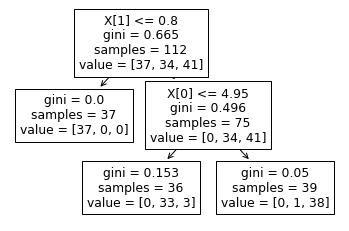

In [6]:
plot_tree(DTC_model)

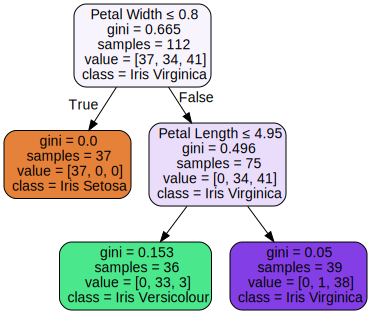

In [7]:
dot_data = export_graphviz(DTC_model, out_file=None, feature_names=['Petal Length', 'Petal Width'], class_names=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'], filled=True, rounded=True, special_characters=True)
graph = graph_from_dot_data(dot_data)
graph.write_pdf("iris.pdf")
Source(dot_data)

<AxesSubplot:>

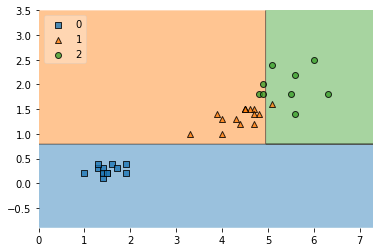

In [8]:
plot_decision_regions(X_test, y_test, DTC_model, legend=2)